# CFS

NOAA's Climate Forecast System.

<https://cfs.ncep.noaa.gov/>


In [1]:
from herbie import Herbie
from herbie.toolbox import EasyMap, pc, ccrs
import matplotlib.pyplot as plt

## Time Series product

For reference of what variables are avaialble: <https://www.nco.ncep.noaa.gov/pmb/products/cfs/#DAILY>

In [ ]:
H = Herbie(
    "2024-12-25",
    model="cfs_time_series",
    member=1,
    product="wnd10m",
)
H

/home/blaylock/GITHUB/Herbie/herbie/models/cfs.py:119: UserWarning: Herbie's CFS templates are and subject to major changes. PRs are welcome to improve it.
  warnings.warn(


✅ Found ┊ model=cfs_time_series ┊ product=wnd10m ┊ 2024-Dec-25 00:00 UTC F00 ┊ GRIB2 @ local ┊ IDX @ aws


▌▌Herbie CFS_TIME_SERIES model wnd10m product initialized 2024-Dec-25 00:00 UTC F00 ┊ source=local

In [ ]:
# Show all available products
H.PRODUCTS

{'wnd10m': 'Wind u and v at 10 m',
 'wnd1000': 'Wind u and v at 1000 hPa',
 'wnd925': 'Wind u and v at 925 hPa',
 'wnd850': 'Wind u and v at 850 hPa',
 'wnd500': 'Wind u and v at 500 hPa',
 'wnd700': 'Wind u and v at 700 hPa',
 'wnd250': 'Wind u and v at 250 hPa',
 'wnd200': 'Wind u and v at 200 hPa',
 'wndstrs': 'Stress at surface',
 'prmsl': 'Pressure Reduced to MSL',
 'pressfc': 'Surface Pressure',
 'z1000': 'GeoPotential Height at 1000 hPa',
 'z850': 'GeoPotential Height at 850 hPa',
 'z700': 'GeoPotential Height at 700 hPa',
 'z500': 'GeoPotential Height at 500 hPa',
 'z200': 'GeoPotential Height at 200 hPa',
 'tmpsfc': 'Temperature at the Surface',
 'tmp2m': 'Temperature at 2 m',
 'tmin': 'Minimum Temperature at 2 m',
 'tmax': 'Maximum Temperature at 2 m',
 't1000': 'Temperature at 1000 hPa',
 't850': 'Temperature at 850 hPa',
 't700': 'Temperature at 700 hPa',
 't500': 'Temperature at 500 hPa',
 't250': 'Temperature at 250 hPa',
 't200': 'Temperature at 200 hPa',
 't50': 'Temper

In [ ]:
H.inventory()

,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,search_this
0,1,0,59301.0,0-59301,2024-12-25,2024-12-25,UGRD,10 m above ground,6 hour fcst,:UGRD:10 m above ground:6 hour fcst
1,2,59302,118392.0,59302-118392,2024-12-25,2024-12-25,UGRD,10 m above ground,12 hour fcst,:UGRD:10 m above ground:12 hour fcst
2,3,118393,177524.0,118393-177524,2024-12-25,2024-12-25,UGRD,10 m above ground,18 hour fcst,:UGRD:10 m above ground:18 hour fcst
3,4,177525,236395.0,177525-236395,2024-12-25,2024-12-25,UGRD,10 m above ground,24 hour fcst,:UGRD:10 m above ground:24 hour fcst
4,5,236396,296075.0,236396-296075,2024-12-25,2024-12-25,VGRD,10 m above ground,6 hour fcst,:VGRD:10 m above ground:6 hour fcst
...,...,...,...,...,...,...,...,...,...,...
2235,2236,133377545,133438170.0,133377545-133438170,2024-12-25,2024-12-25,VGRD,10 m above ground,6696 hour fcst,:VGRD:10 m above ground:6696 hour fcst
2236,2237,133438171,133498583.0,133438171-133498583,2024-12-25,2024-12-25,VGRD,10 m above ground,6702 hour fcst,:VGRD:10 m above ground:6702 hour fcst
2237,2238,133498584,133559433.0,133498584-133559433,2024-12-25,2024-12-25,VGRD,10 m above ground,6708 hour fcst,:VGRD:10 m above ground:6708 hour fcst
2238,2239,133559434,133620144.0,133559434-133620144,2024-12-25,2024-12-25,VGRD,10 m above ground,6714 hour fcst,:VGRD:10 m above ground:6714 hour fcst


In [ ]:
# Only get 6 hour forecast
H.inventory("[U,V]GRD:10 m.*:6 hour")


,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,search_this
0,1,0,59301.0,0-59301,2024-12-25,2024-12-25,UGRD,10 m above ground,6 hour fcst,:UGRD:10 m above ground:6 hour fcst
4,5,236396,296075.0,236396-296075,2024-12-25,2024-12-25,VGRD,10 m above ground,6 hour fcst,:VGRD:10 m above ground:6 hour fcst


In [ ]:
ds = H.xarray("[U,V]GRD:10 m.*:6 hour")

In [ ]:
ds["wind_speed"] = (ds.u10**2 + ds.v10**2) ** 0.5
ds

<xarray.Dataset> Size: 880kB
Dimensions:              (latitude: 190, longitude: 384)
Coordinates:
    time                 datetime64[ns] 8B 2024-12-25
    step                 timedelta64[ns] 8B 06:00:00
    heightAboveGround    float64 8B 10.0
  * latitude             (latitude) float64 2kB 89.28 88.34 ... -88.34 -89.28
  * longitude            (longitude) float64 3kB 0.0 0.9375 ... 358.1 359.1
    valid_time           datetime64[ns] 8B 2024-12-25T06:00:00
    gribfile_projection  object 8B None
Data variables:
    u10                  (latitude, longitude) float32 292kB -3.62 ... -2.29
    v10                  (latitude, longitude) float32 292kB -2.57 ... -3.33
    wind_speed           (latitude, longitude) float32 292kB 4.44 ... 4.041
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   cfs_time_series
    product:                 wnd10m
    description:             Climate Forecast System; Time Series
    remote_grib:             /home/blaylock/data/cfs_time_series/20241225/wnd...
    local_grib:              /home/blaylock/data/cfs_time_series/20241225/sub...
    search:                  [U,V]GRD:10 m.*:6 hour

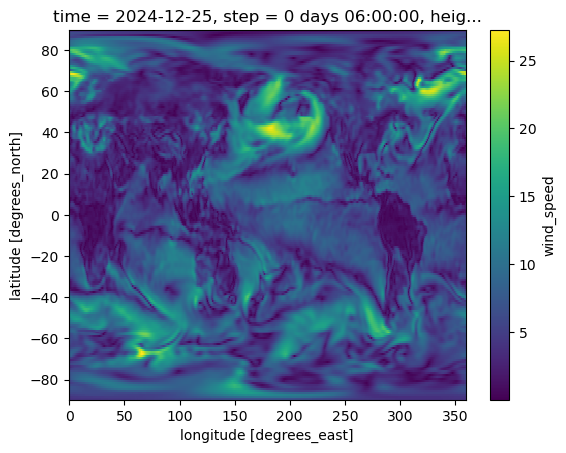

In [ ]:
ds["wind_speed"].plot()

## Monthly Product

In [2]:
H = Herbie("2024-05-25", model="cfs_monthly", member=1, YYYYMM="202407", hour=None)

/home/blaylock/GITHUB/Herbie/herbie/models/cfs.py:16: UserWarning: Herbie's CFC monthly template is ALPHA. PRs are welcome to improve it.
  warnings.warn(


✅ Found ┊ model=cfs_monthly ┊ product=flxf ┊ 2024-May-25 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


In [3]:
H.inventory()

,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,search_this
0,1.0,0,64800.0,0-64800,2024-05-25,2024-05-25,UFLX,surface,2-3 month ave fcst,:UFLX:surface:2-3 month ave fcst
1,2.0,64801,128325.0,64801-128325,2024-05-25,2024-05-25,VFLX,surface,2-3 month ave fcst,:VFLX:surface:2-3 month ave fcst
2,3.0,128326,187255.0,128326-187255,2024-05-25,2024-05-25,SHTFL,surface,2-3 month ave fcst,:SHTFL:surface:2-3 month ave fcst
3,4.0,187256,249578.0,187256-249578,2024-05-25,2024-05-25,LHTFL,surface,2-3 month ave fcst,:LHTFL:surface:2-3 month ave fcst
4,5.0,249579,321695.0,249579-321695,2024-05-25,2024-05-25,TMP,surface,2-3 month ave fcst,:TMP:surface:2-3 month ave fcst
...,...,...,...,...,...,...,...,...,...,...
98,97.0,5119805,5162753.0,5119805-5162753,2024-05-25,2024-05-25,VBDSF,surface,2-3 month ave fcst,:VBDSF:surface:2-3 month ave fcst
99,98.0,5162754,5202292.0,5162754-5202292,2024-05-25,2024-05-25,VDDSF,surface,2-3 month ave fcst,:VDDSF:surface:2-3 month ave fcst
100,99.0,5202293,5251385.0,5202293-5251385,2024-05-25,2024-05-25,NBDSF,surface,2-3 month ave fcst,:NBDSF:surface:2-3 month ave fcst
101,100.0,5251386,5294847.0,5251386-5294847,2024-05-25,2024-05-25,NDDSF,surface,2-3 month ave fcst,:NDDSF:surface:2-3 month ave fcst


In [4]:
H.inventory("TMP:2 m")

,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,search_this
37,37.0,2308439,2382743.0,2308439-2382743,2024-05-25,2024-05-25,TMP,2 m above ground,2-3 month ave fcst,:TMP:2 m above ground:2-3 month ave fcst


In [5]:
ds = H.xarray("TMP:2 m")

In [6]:
ds

<xarray.Dataset> Size: 296kB
Dimensions:              (latitude: 190, longitude: 384)
Coordinates:
    time                 datetime64[ns] 8B 2024-05-25
    step                 timedelta64[ns] 8B 90 days
    heightAboveGround    float64 8B 2.0
  * latitude             (latitude) float64 2kB 89.28 88.34 ... -88.34 -89.28
  * longitude            (longitude) float64 3kB 0.0 0.9375 ... 358.1 359.1
    valid_time           datetime64[ns] 8B 2024-08-23
    gribfile_projection  object 8B None
Data variables:
    mean2t               (latitude, longitude) float32 292kB 273.3 ... 224.7
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   cfs_monthly
    product:                 flxf
    description:             Climate Forecast System; Monthly Means
    remote_grib:             https://noaa-cfs-pds.s3.amazonaws.com/cfs.202405...
    local_grib:              /home/blaylock/data/cfs_monthly/20240525/subset_...
    search:                  TMP:2 m

Text(0.5, 1.0, 'Initialized:2024-05-25\nMember:1; Month:202407; Hour:None')

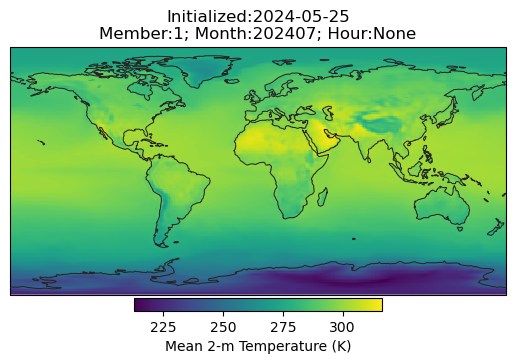

In [7]:
ax = EasyMap(crs=ds.herbie.crs).ax
art = ax.pcolormesh(ds.longitude, ds.latitude, ds.mean2t, transform=pc)

plt.colorbar(
    art,
    ax=ax,
    shrink=0.5,
    pad=0.01,
    orientation="horizontal",
    label="Mean 2-m Temperature (K)",
)

ax.set_title(
    f"Initialized:{H.date:%Y-%m-%d}\nMember:{H.member}; Month:{H.YYYYMM}; Hour:{H.hour}"
)

## 6 Hourly Product

In [8]:
H = Herbie("2024-12-25", model="cfs_6_hourly", member=1)

/home/blaylock/GITHUB/Herbie/herbie/models/cfs.py:74: UserWarning: Herbie's CFS templates are and subject to major changes. PRs are welcome to improve it.
  warnings.warn(


✅ Found ┊ model=cfs_6_hourly ┊ product=flxf ┊ 2024-Dec-25 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


In [10]:
H.inventory()

,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,search_this
0,1.0,0,51547.0,0-51547,2024-12-25,2024-12-25,UFLX,surface,anl,:UFLX:surface:anl
1,2.0,51548,102490.0,51548-102490,2024-12-25,2024-12-25,VFLX,surface,anl,:VFLX:surface:anl
2,3.0,102491,144611.0,102491-144611,2024-12-25,2024-12-25,SHTFL,surface,anl,:SHTFL:surface:anl
3,4.0,144612,189240.0,144612-189240,2024-12-25,2024-12-25,LHTFL,surface,anl,:LHTFL:surface:anl
4,5.0,189241,277385.0,189241-277385,2024-12-25,2024-12-25,TMP,surface,anl,:TMP:surface:anl
...,...,...,...,...,...,...,...,...,...,...
96,95.0,4103223,4126549.0,4103223-4126549,2024-12-25,2024-12-25,VBDSF,surface,anl,:VBDSF:surface:anl
97,96.0,4126550,4151458.0,4126550-4151458,2024-12-25,2024-12-25,VDDSF,surface,anl,:VDDSF:surface:anl
98,97.0,4151459,4178959.0,4151459-4178959,2024-12-25,2024-12-25,NBDSF,surface,anl,:NBDSF:surface:anl
99,98.0,4178960,4206531.0,4178960-4206531,2024-12-25,2024-12-25,NDDSF,surface,anl,:NDDSF:surface:anl


In [9]:
H.inventory("TMP:2 m")

,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,search_this
37,37.0,2027725,2110551.0,2027725-2110551,2024-12-25,2024-12-25,TMP,2 m above ground,anl,:TMP:2 m above ground:anl


Text(0.5, 1.0, 'Initialized:2024-12-25\nMember:1')

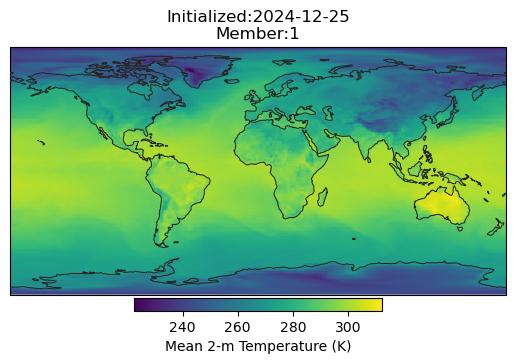

In [10]:
ds = H.xarray("TMP:2 m")

ax = EasyMap(crs=ds.herbie.crs).ax
art = ax.pcolormesh(ds.longitude, ds.latitude, ds.t2m, transform=pc)

plt.colorbar(
    art,
    ax=ax,
    shrink=0.5,
    pad=0.01,
    orientation="horizontal",
    label="Mean 2-m Temperature (K)",
)

ax.set_title(f"Initialized:{H.date:%Y-%m-%d}\nMember:{H.member}")